In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

In [21]:
data = pd.read_csv('Big_Black_Money_Dataset (2).csv')

In [22]:
risk_categories = data['Money Laundering Risk Score'].dropna().unique()


Processing Money Laundering Risk Score: Medium
Number of records for Medium Risk: 1754
k = 2: sil_sco = 0.2761, DB_sco = 1.4769
k = 3: sil_sco = 0.2610, DB_sco = 1.2639
k = 4: sil_sco = 0.2776, DB_sco = 1.2178
k = 5: sil_sco = 0.2808, DB_sco = 1.0950
k = 6: sil_sco = 0.2950, DB_sco = 0.9863
k = 7: sil_sco = 0.2887, DB_sco = 0.9970
k = 8: sil_sco = 0.2860, DB_sco = 1.0126
k = 9: sil_sco = 0.2818, DB_sco = 1.0487
k = 10: sil_sco = 0.2736, DB_sco = 1.0826

Best k for Medium Risk (sil_sco): 6
Best k for Medium Risk (DB_sco): 6

Selected Best k for Medium Risk: 6 using Davies-Bouldin Score


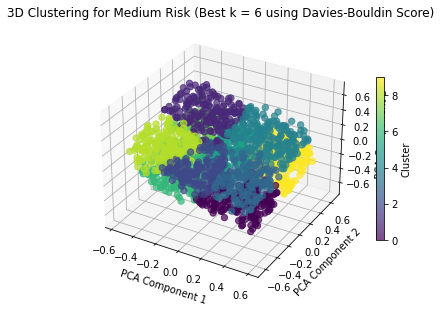


Processing Money Laundering Risk Score: High
Number of records for High Risk: 1415
k = 2: sil_sco = 0.2683, DB_sco = 1.5106
k = 3: sil_sco = 0.2555, DB_sco = 1.2810
k = 4: sil_sco = 0.2726, DB_sco = 1.2263
k = 5: sil_sco = 0.2740, DB_sco = 1.1099
k = 6: sil_sco = 0.2923, DB_sco = 0.9897
k = 7: sil_sco = 0.2902, DB_sco = 0.9961
k = 8: sil_sco = 0.2901, DB_sco = 0.9867
k = 9: sil_sco = 0.2873, DB_sco = 1.0210
k = 10: sil_sco = 0.2810, DB_sco = 1.0335

Best k for High Risk (sil_sco): 6
Best k for High Risk (DB_sco): 8

Selected Best k for High Risk: 8 using Davies-Bouldin Score


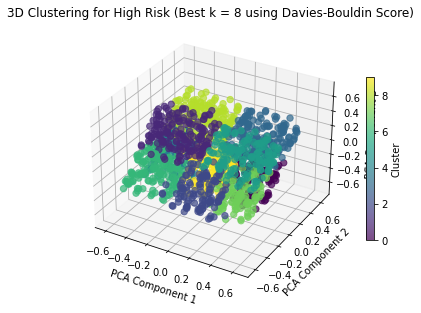


Processing Money Laundering Risk Score: Low
Number of records for Low Risk: 1340
k = 2: sil_sco = 0.2685, DB_sco = 1.4954
k = 3: sil_sco = 0.2510, DB_sco = 1.3264
k = 4: sil_sco = 0.2691, DB_sco = 1.2082
k = 5: sil_sco = 0.2673, DB_sco = 1.1215
k = 6: sil_sco = 0.2847, DB_sco = 1.0118
k = 7: sil_sco = 0.2832, DB_sco = 1.0178
k = 8: sil_sco = 0.2730, DB_sco = 1.0299
k = 9: sil_sco = 0.2749, DB_sco = 1.0375
k = 10: sil_sco = 0.2708, DB_sco = 1.0533

Best k for Low Risk (sil_sco): 6
Best k for Low Risk (DB_sco): 6

Selected Best k for Low Risk: 6 using Davies-Bouldin Score


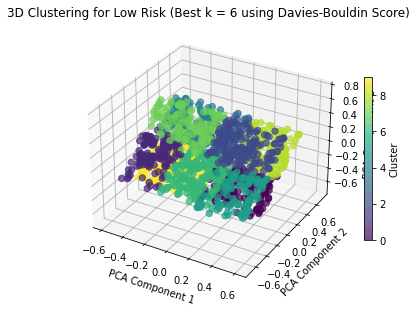

In [27]:
# Iterate through each risk category and perform KMeans clustering
for risk_category in risk_categories:
    print(f"\nProcessing Money Laundering Risk Score: {risk_category}")

    # Filter the dataset for the current risk category
    filtered_data = data[data['Money Laundering Risk Score'] == risk_category]

    # Print the number of rows for this category
    print(f"Number of records for {risk_category} Risk: {len(filtered_data)}")

    # Select numerical features
    features = filtered_data[['Amount (USD)', 'Shell Companies Involved', 'Person Involved']].select_dtypes(include=['number'])

    # Skip if there is not enough data for clustering
    if features.shape[0] < 2:
        print(f"Not enough data for clustering in category: {risk_category}")
        continue

    # Normalize the data using Min-Max Scaling
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(features)

    # Apply PCA to reduce dimensionality to 3 components for visualization
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(normalized_data)

    # Initialize variables to store the best k and metrics
    sil_sco_list = []
    DB_sco_list = []
    best_k_sil_sco = None
    best_k_DB_sco = None
    best_sil_sco = -1
    best_DB_sco = float('inf')

    # Iterate over different values of k (number of clusters) to find the best k
    for k in range(2, 11):  # Testing k from 2 to 10
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(reduced_data)

        # Calculate Silhouette Score
        sil_sco = silhouette_score(reduced_data, labels)
        sil_sco_list.append(sil_sco)

        # Calculate Davies-Bouldin Score
        DB_sco = davies_bouldin_score(reduced_data, labels)
        DB_sco_list.append(DB_sco)

        # Print metrics for the current k
        print(f"k = {k}: sil_sco = {sil_sco:.4f}, DB_sco = {DB_sco:.4f}")

        # Track the best k for Silhouette Score
        if sil_sco > best_sil_sco:
            best_sil_sco = sil_sco
            best_k_sil_sco = k

        # Track the best k for Davies-Bouldin Score
        if DB_sco < best_DB_sco:
            best_DB_sco = DB_sco
            best_k_DB_sco = k

    # Print the best k values for the current risk category
    print(f"\nBest k for {risk_category} Risk (sil_sco): {best_k_sil_sco}")
    print(f"Best k for {risk_category} Risk (DB_sco): {best_k_DB_sco}")

    # Select the best method based on scores
    if best_sil_sco > (1 / best_DB_sco):
        best_k = best_k_sil_sco
        best_method = "Silhouette Score"
    else:
        best_k = best_k_DB_sco
        best_method = "Davies-Bouldin Score"

    print(f"\nSelected Best k for {risk_category} Risk: {best_k} using {best_method}")

    # Plot 3D visualization for the selected best k
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
        c=labels, cmap='viridis', s=40, alpha=0.7
    )

    ax.set_title(f"3D Clustering for {risk_category} Risk (Best k = {best_k} using {best_method})", fontsize=12)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

    # Add legend
    legend = fig.colorbar(scatter, ax=ax, shrink=0.6)
    legend.set_label("Cluster")
    plt.show()